In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.datasets import mnist

In [2]:
(x_train, _),(x_test, _) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [5]:
# reshape in the input data for the model

x_train = x_train.reshape(len(x_train),28,28,1)
x_test = x_test.reshape(len(x_test),28,28,1)
x_test.shape

(10000, 28, 28, 1)

Adding noise to the image.

In [6]:
noise_factor = 0.6
x_train_noisy = x_train + noise_factor * np.random.normal(loc = 0.0, scale = 1.0, size = x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc = 0.0, scale = 1.0, size = x_test.shape)

In [7]:
# clip the values in range 0-1

x_train_noisy = np.clip(x_train_noisy, 0. , 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

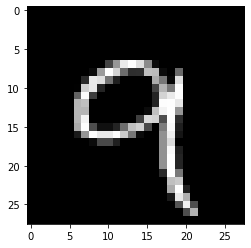

In [8]:
# randomly select the input image

index = np.random.randint(len(x_test))
# plot image
plt.imshow(x_test[index].reshape(28,28))
plt.gray()

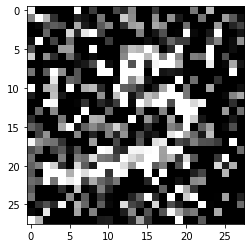

In [11]:
index = np.random.randint(len(x_test))
# plot image
plt.imshow(x_test_noisy[index].reshape(28,28))
plt.gray()

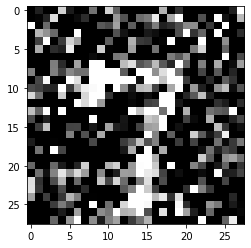

In [12]:
index = np.random.randint(len(x_test))
# plot image
plt.imshow(x_test_noisy[index].reshape(28,28))
plt.gray()

Model Creation

In [13]:
model = Sequential([
    # encoder network
    Conv2D(32, 3, activation = 'relu', padding = 'same', input_shape=(28,28,1)),
    MaxPooling2D(2, padding = 'same'),
    Conv2D(16, 3, activation = 'relu', padding = 'same'),
    MaxPooling2D(2, padding = 'same'),
    #decoder network
    Conv2D(16, 3, activation = 'relu', padding = 'same'),
    UpSampling2D(2),
    Conv2D(32, 3, activation = 'relu', padding = 'same'),
    UpSampling2D(2),
    #output layer
    Conv2D(1,3,activation = 'sigmoid', padding = 'same')
])

In [14]:
model.compile(optimizer='adam', loss='binary_crossentropy')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 16)          2320      
                                                                 
 up_sampling2d (UpSampling2D  (None, 14, 14, 16)       0

In [15]:
# train the model
model.fit(x_train_noisy,x_train, epochs = 20, batch_size = 32, validation_data = (x_test_noisy, x_test))

Epoch 1/20
1875/1875 [==============================] - 146s 77ms/step - loss: 0.1499 - val_loss: 0.1231
Epoch 2/20
1875/1875 [==============================] - 148s 79ms/step - loss: 0.1221 - val_loss: 0.1184
Epoch 3/20
1875/1875 [==============================] - 144s 77ms/step - loss: 0.1187 - val_loss: 0.1159
Epoch 4/20
1875/1875 [==============================] - 148s 79ms/step - loss: 0.1162 - val_loss: 0.1138
Epoch 5/20
1875/1875 [==============================] - 143s 76ms/step - loss: 0.1146 - val_loss: 0.1129
Epoch 6/20
1875/1875 [==============================] - 147s 78ms/step - loss: 0.1135 - val_loss: 0.1125
Epoch 7/20
1875/1875 [==============================] - 144s 77ms/step - loss: 0.1128 - val_loss: 0.1112
Epoch 8/20
1875/1875 [==============================] - 149s 79ms/step - loss: 0.1123 - val_loss: 0.1110
Epoch 9/20
1875/1875 [==============================] - 147s 78ms/step - loss: 0.1120 - val_loss: 0.1111
Epoch 10/20
1875/1875 [==============================] 

Visualize the results

In [17]:
# PREDICT the results from the models
pred = model.predict(x_test_noisy)

313/313 [==============================] - 6s 19ms/step


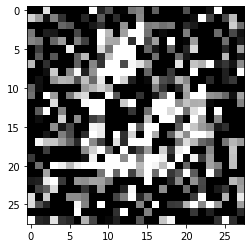

In [20]:
# randomly select the input image
index = np.random.randint(len(x_test))
plt.imshow(x_test_noisy[index].reshape(28,28))
plt.gray()

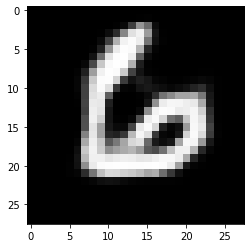

In [21]:
#visualize the compressed image
plt.imshow(pred[index].reshape(28,28))
plt.gray()

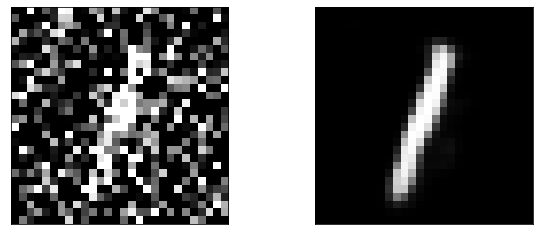

In [22]:
index = np.random.randint(len(x_test))
plt.figure(figsize=(10,4))

ax = plt.subplot(1,2,1)
plt.imshow(x_test_noisy[index].reshape(28,28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

ax = plt.subplot(1,2,2)
plt.imshow(pred[index].reshape(28,28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()

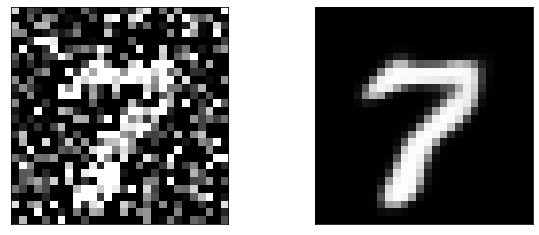

In [23]:
index = np.random.randint(len(x_test))
plt.figure(figsize=(10,4))

ax = plt.subplot(1,2,1)
plt.imshow(x_test_noisy[index].reshape(28,28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

ax = plt.subplot(1,2,2)
plt.imshow(pred[index].reshape(28,28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()